## ***but du notebook***
*Exploration 1:*  
Construire une image moyenne de chaque catégorie.


In [13]:
import sys
sys.path.append('../src')

In [14]:
import configparser
config = configparser.ConfigParser()
config.read('../Rakuten_config2.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
def get_RACINE_IMAGES() :
    return config['DOSSIER']['RACINE_IMAGES']
print( get_RACINE_DOSSIER())
print( get_RACINE_IMAGES())

../input/
../data/images/image_train/


In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [16]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
cat=df_target['prdtypecode'].sort_values().unique()
cat
nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

In [17]:
df_feats.head(5)
cat=df_target['prdtypecode'].sort_values().unique()

In [18]:
cat

array([  10,   40,   50,   60, 1140, 1160, 1180, 1280, 1281, 1300, 1301,
       1302, 1320, 1560, 1920, 1940, 2060, 2220, 2280, 2403, 2462, 2522,
       2582, 2583, 2585, 2705, 2905], dtype=int64)

In [19]:
df['nom_image']=df.apply(lambda row: "image_" +  str(row['imageid'])
                                     + "_product_" + str(row['productid']) + ".jpg",axis=1)
print("Nb images ", str(df.shape[0]))
df_img=df.copy()

Nb images  84916


# Test d'une image moyenne de la catégorie 40

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 31 to 84911
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           2508 non-null   int64 
 1   designation  2508 non-null   object
 2   description  866 non-null    object
 3   productid    2508 non-null   int64 
 4   imageid      2508 non-null   int64 
 5   prdtypecode  2508 non-null   int64 
 6   nom_image    2508 non-null   object
dtypes: int64(4), object(3)
memory usage: 156.8+ KB
None
31                                   X-Men 3 - The Movie
34                                 The Lord Or Thé Rings
47          Shin Masoukishin Panzer Warfare (Import Jap)
50                                Jeu Pc Cd-Rom : Azteca
101         Innercity Burnout [Import Allemand] [Jeu Pc]
107    Zumba Fitness : Rush (Jeu Kinect) [Import Alle...
142               Pokémon Saphir Alpha - Edition Limitée
195                     King's Bounty - Armored Princess
204    Câble Ad

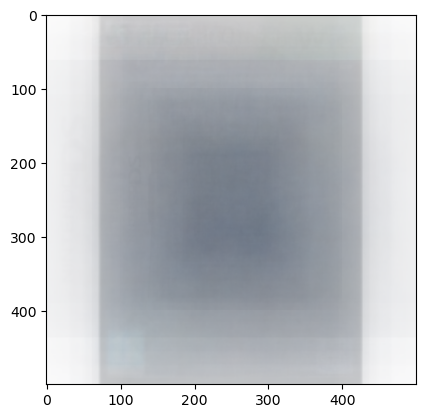

In [20]:
import os
import cv2
import numpy as np

from PIL import Image

# Définir le chemin du dossier contenant les images
folder_path = get_RACINE_IMAGES()

df_img=df[df['prdtypecode'].isin([40])]


print(df_img.info())
print(df_img['designation'].head(10))

# Charger les images et les stocker dans un tableau
fichiers_images = []

for filename in df_img['nom_image']:
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        fichiers_images.append(img)

# Lire la première image pour obtenir la taille
premiere_image = fichiers_images[0]
hauteur, largeur, _ = premiere_image.shape

print("-"*20)
print("hauteur , largeur : ",hauteur, largeur)
print("Nombre d'images : " , len(fichiers_images))
print("-"*20)

# Créez un tableau numpy pour stocker la somme de toutes les images
somme_images = np.zeros((hauteur, largeur, 3), np.float32)

# Parcourez chaque image
for fichier_image in fichiers_images:
    image = fichier_image
    somme_images = somme_images + image


# Calculer la moyenne des images en divisant la somme par le nombre d'images
moyenne_images = somme_images / len(fichiers_images)


moyenne_images = np.array(np.round(moyenne_images), dtype=np.uint8)

plt.imshow(moyenne_images)
plt.show()




# Représentation des 10 premières images de la catégorie 40

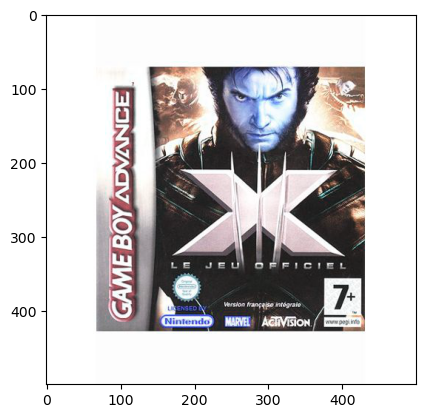

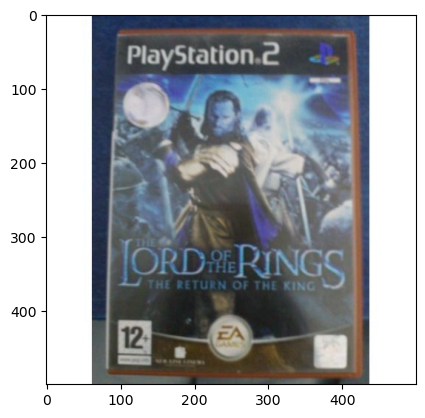

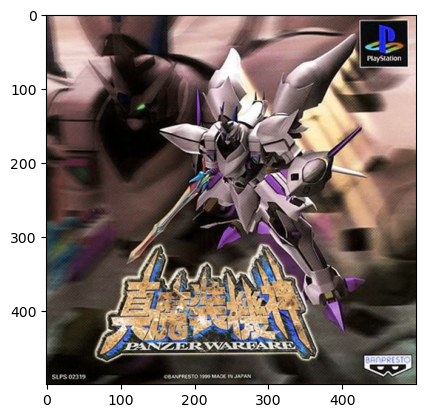

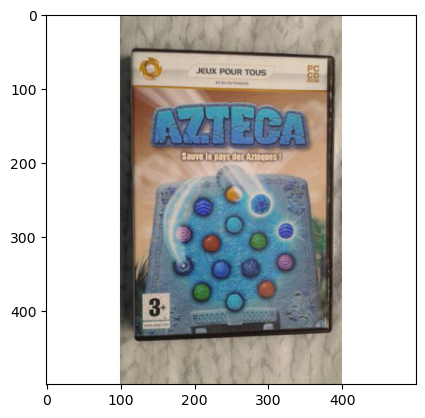

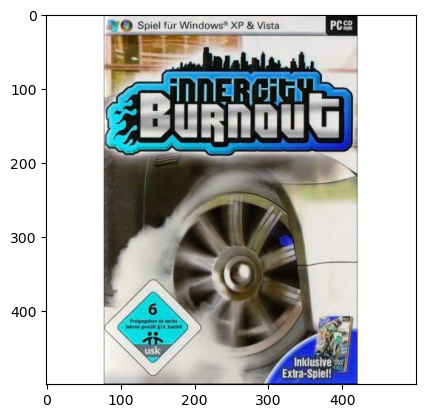

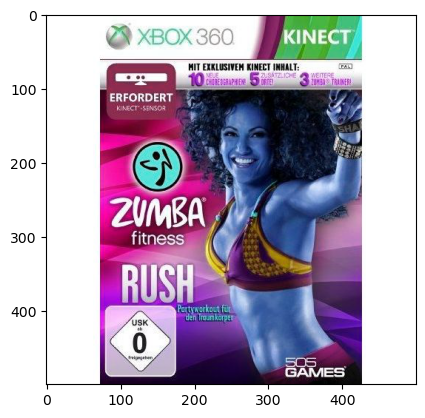

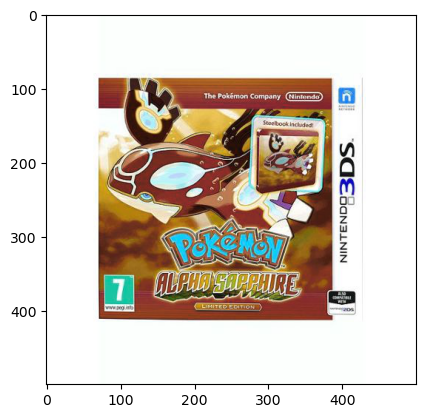

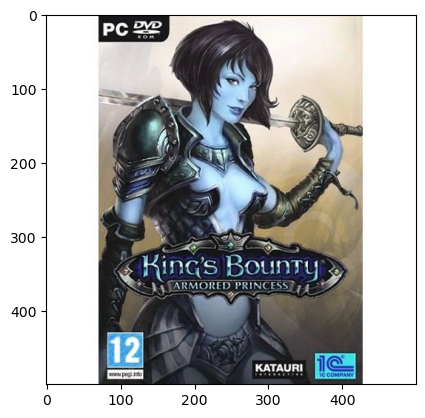

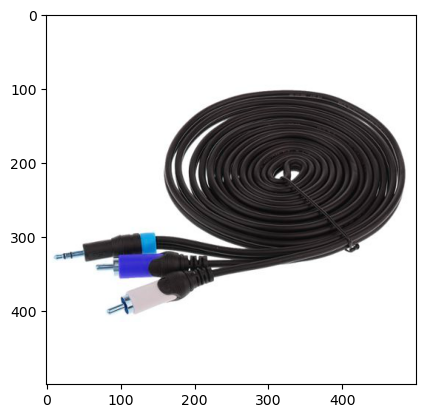

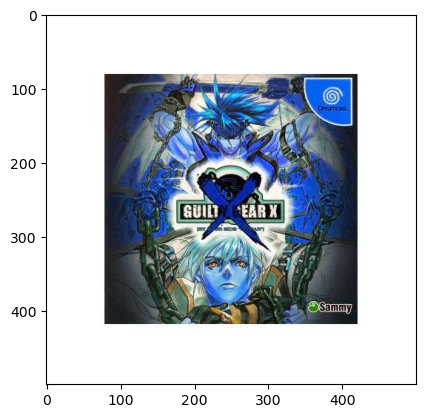

In [22]:
for i in range(10):
    image=fichiers_images[i]
    plt.imshow(image)
    plt.show()

## Images moyenne par Catégorie

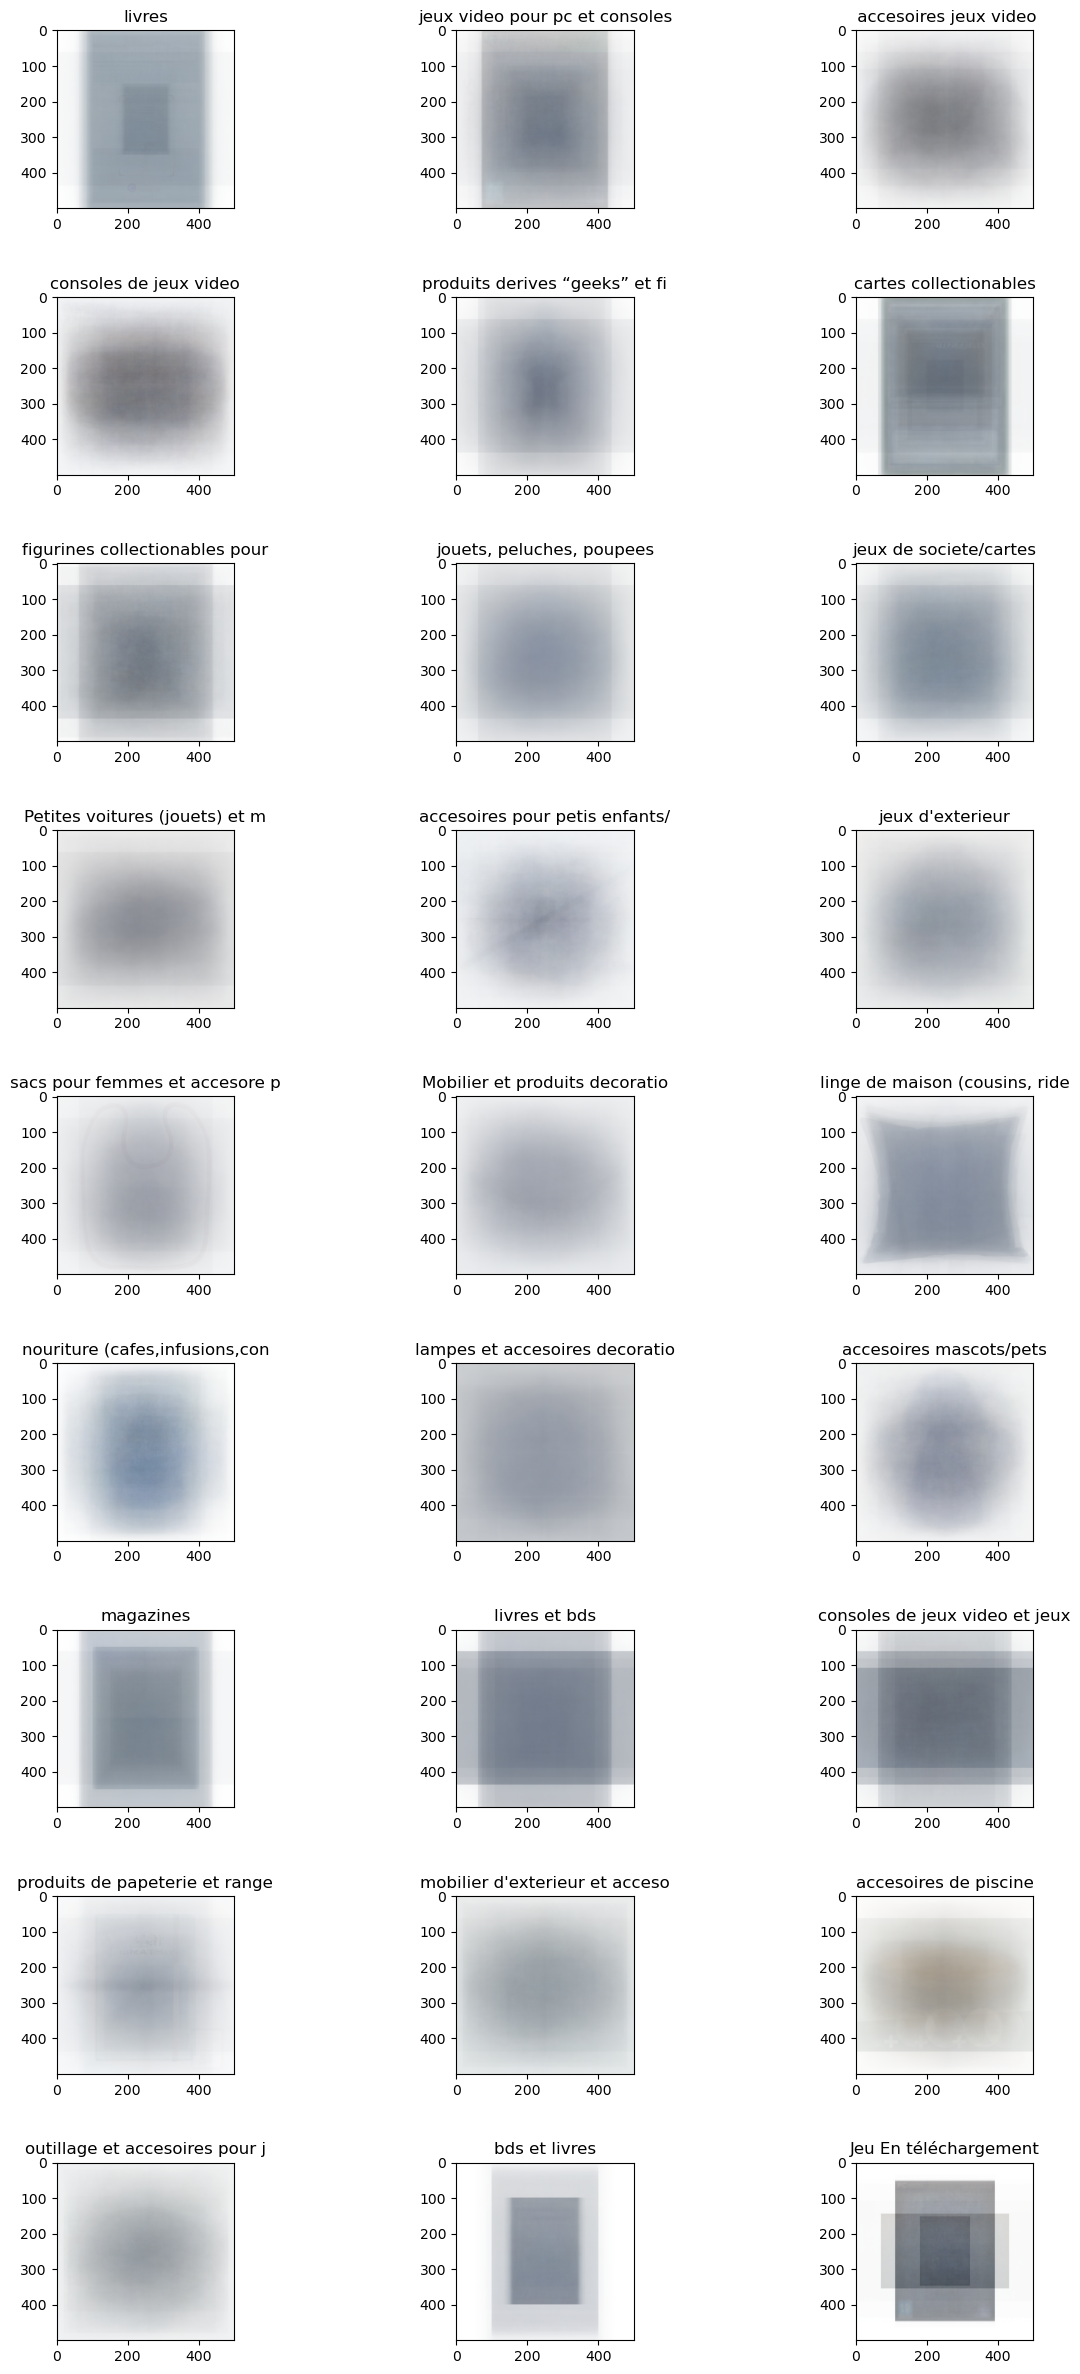

In [23]:
import os
import cv2
import numpy as np

folder_path = get_RACINE_IMAGES()
df_img=df.copy()
Dfhisto=pd.DataFrame()
fig, axs = plt.subplots(9, 3, figsize=(15,30))
for c,ax in zip(cat,axs.flat):
    fichiers_images = []
    for filename in df_img[df_img['prdtypecode']==c]['nom_image']:
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            fichiers_images.append(img)

    premiere_image = fichiers_images[0]
    hauteur, largeur, _ = premiere_image.shape

    somme_images = np.zeros((hauteur, largeur, 3), np.float32)

    for fichier_image in fichiers_images:
        image = fichier_image

        somme_images = somme_images + image

    moyenne_images = somme_images / len(fichiers_images)

    moyenne_images = np.array(np.round(moyenne_images), dtype=np.uint8)
    ax.set_title( catdict[c][:30])
    ax.imshow(moyenne_images)
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()
